# Taller No. 1 - Problema 2

Objetivo. La idea es tratar de preprocesar el dataset **Europarl** (Large Corpus Spanish), tokenizarlo, limpiarlo, obtener el modelo de embedding usando Fasttext y comparar la similaridad con el modelo **Word2vec**

## Problema 2

Experimentar sobre el word2vec-scratch el siguiente texto "Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos”. Entrenar el conjunto de palabras del texto, proponga como parámetros, vectores de dimensión 30 y 50 con ajuste de ventana de 3. Crear un procedimiento que visualice todas las palabras del texto en el plano cartesiano usando tsne para las dos dimensiones (30 y 50) con el fin de comparar la similaridad de las palabras en ambas visualizaciones. En términos generales se deben visualizar los vectores de W1 +b1 de las palabras del texto. Estas cercanías de palabras se puede comprobar con la distancia euclideana (def euclidean_dist(vec1, vec2):)

In [ ]:
!pip install tensorflow numpy matplotlib

In [28]:
# Importar las bibliotecas necesarias

#import tensorflow as tf
import numpy as np # version 1.16
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

## Entrenar el texto de Cien años de soledad para generar embeddings de dimensión 30 y 50

In [53]:
import re

def preprocess_text(text):
    # Convertir a minúsculas
    corpus_raw = text.lower()

    # Eliminar espacios adicionales
    corpus_processed = re.sub(r'\s+', ' ', corpus_raw)

    # Dividir en oraciones y tokenizar
    words = set(re.findall(r'\b\w+\b', corpus_processed))

    return words

def build_word_mappings(words):
    # Inicializar diccionarios de mapeo entre palabras e índices y viceversa
    word2int = {word: i for i, word in enumerate(words)}
    int2word = {i: word for i, word in enumerate(words)}

    return word2int, int2word

# Texto de entrada
text = "Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos."

# Preprocesar el texto
words = preprocess_text(text)

# Construir diccionarios de mapeo y obtener el tamaño del vocabulario
word2int, int2word = build_word_mappings(words)
vocab_size = len(words)

# Imprimir el tamaño del vocabulario y las palabras
print("Tamaño del vocabulario:", vocab_size)
print("Palabras:", words)




Tamaño del vocabulario: 54
Palabras: {'veinte', 'a', 'recordar', 'el', 'hielo', 'huevos', 'y', 'por', 'muchos', 'aldea', 'aguas', 'aquella', 'macondo', 'de', 'era', 'construidas', 'que', 'un', 'piedras', 'precipitaban', 'blancas', 'una', 'su', 'barro', 'padre', 'entonces', 'llevó', 'aureliano', 'al', 'lecho', 'lo', 'se', 'remota', 'pulidas', 'fusilamiento', 'como', 'años', 'cañabrava', 'en', 'prehistóricos', 'orilla', 'río', 'diáfanas', 'coronel', 'conocer', 'casas', 'buendía', 'había', 'la', 'pelotón', 'después', 'tarde', 'enormes', 'frente'}


In [54]:
# Separar el corpus en oraciones
raw_sentences = text.split('.')  # Cambiado a text en lugar de corpus_raw
sentences = []

# Iterar sobre las oraciones en el corpus
for sentence in raw_sentences:
    # Dividir cada oración en palabras y agregar a la lista de oraciones
    words_in_sentence = re.findall(r'\b\w+\b', sentence)
    sentences.append(words_in_sentence)

print(sentences)


[['Muchos', 'años', 'después', 'frente', 'al', 'pelotón', 'de', 'fusilamiento', 'el', 'coronel', 'Aureliano', 'Buendía', 'había', 'de', 'recordar', 'aquella', 'tarde', 'remota', 'en', 'que', 'su', 'padre', 'lo', 'llevó', 'a', 'conocer', 'el', 'hielo'], ['Macondo', 'era', 'entonces', 'una', 'aldea', 'de', 'veinte', 'casas', 'de', 'barro', 'y', 'cañabrava', 'construidas', 'a', 'la', 'orilla', 'de', 'un', 'río', 'de', 'aguas', 'diáfanas', 'que', 'se', 'precipitaban', 'por', 'un', 'lecho', 'de', 'piedras', 'pulidas', 'blancas', 'y', 'enormes', 'como', 'huevos', 'prehistóricos'], []]


In [71]:
# Tamaño de la ventana para el contexto
WINDOW_SIZE = 3

# Inicializar una lista para almacenar los pares de palabras (word, nb_word)
data = []

# Iterar sobre cada oración en la lista de oraciones
for sentence in sentences:
    # Iterar sobre cada índice y palabra en la oración
    for word_index, word in enumerate(sentence):
        # Iterar sobre las palabras en la ventana de contexto alrededor de la palabra actual
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0): min(word_index + WINDOW_SIZE, len(sentence)) + 1]:
            # Verificar que la palabra vecina no sea igual a la palabra actual
            if nb_word != word:
                # Agregar el par [word, nb_word] a la lista de datos
                data.append([word, nb_word])



In [33]:
print(data)
print(len(data))

[['Muchos', 'años'], ['Muchos', 'después'], ['Muchos', 'frente'], ['años', 'Muchos'], ['años', 'después'], ['años', 'frente'], ['años', 'al'], ['después', 'Muchos'], ['después', 'años'], ['después', 'frente'], ['después', 'al'], ['después', 'pelotón'], ['frente', 'Muchos'], ['frente', 'años'], ['frente', 'después'], ['frente', 'al'], ['frente', 'pelotón'], ['frente', 'de'], ['al', 'años'], ['al', 'después'], ['al', 'frente'], ['al', 'pelotón'], ['al', 'de'], ['al', 'fusilamiento'], ['pelotón', 'después'], ['pelotón', 'frente'], ['pelotón', 'al'], ['pelotón', 'de'], ['pelotón', 'fusilamiento'], ['pelotón', 'el'], ['de', 'frente'], ['de', 'al'], ['de', 'pelotón'], ['de', 'fusilamiento'], ['de', 'el'], ['de', 'coronel'], ['fusilamiento', 'al'], ['fusilamiento', 'pelotón'], ['fusilamiento', 'de'], ['fusilamiento', 'el'], ['fusilamiento', 'coronel'], ['fusilamiento', 'Aureliano'], ['el', 'pelotón'], ['el', 'de'], ['el', 'fusilamiento'], ['el', 'coronel'], ['el', 'Aureliano'], ['el', 'Buendí

In [34]:
# Función para convertir números a vectores one-hot
def to_one_hot(data_point_index, vocab_size):
    # Crear un vector de ceros de tamaño vocab_size
    temp = np.zeros(vocab_size)

    # Establecer el índice correspondiente a 1 para representar la codificación one-hot
    temp[data_point_index] = 1

    # Devolver el vector one-hot resultante
    return temp



In [52]:
# Crear pares de palabras para el entrenamiento
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - 2, 0): min(word_index + 2, len(sentence)) + 1]:
            if nb_word != word:
                data.append([word, nb_word])

# Inicializar conjuntos de entrenamiento
x_train, y_train = [], []

# Crear conjuntos de entrenamiento utilizando la función to_one_hot
for data_word in data:
    x_train.append(to_one_hot(word2int[data_word[0].lower()], vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1].lower()], vocab_size))

# Convertir los conjuntos de entrenamiento a matrices numpy
x_train, y_train = np.asarray(x_train), np.asarray(y_train)

# Imprimir conjuntos de entrenamiento
print('Conjunto X de entrenamiento:\n', x_train)
print('\nConjunto Y de entrenamiento:\n', y_train)



Conjunto X de entrenamiento:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Conjunto Y de entrenamiento:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
print('conjunto X de entrenamiento---------')

print(x_train,y_train,'\n')


conjunto X de entrenamiento---------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



In [37]:
print(x_train.shape[0])


248


In [67]:
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def train_word_embedding(vocab_size, data, embedding_dim):
    # Función auxiliar para convertir un índice de punto de datos en codificación one-hot
    def to_one_hot(data_point_index, vocab_size):
        temp = np.zeros(vocab_size)
        temp[data_point_index] = 1
        return temp

    # Inicializar conjuntos de entrenamiento
    x_train, y_train = [], []

    # Crear conjuntos de entrenamiento utilizando la función to_one_hot
    for data_word in data:
        x_train.append(to_one_hot(word2int[data_word[0].lower()], vocab_size))
        y_train.append(to_one_hot(word2int[data_word[1].lower()], vocab_size))

    # Convertir los conjuntos de entrenamiento a matrices numpy
    x_train, y_train = np.asarray(x_train), np.asarray(y_train)

    # Crear tensores de entrada y salida usando tf.keras.Input
    x = tf.keras.Input(shape=(vocab_size,), dtype=tf.float32)
    y_label = tf.keras.Input(shape=(vocab_size,), dtype=tf.float32)

    # Definir las variables del modelo
    W1 = tf.Variable(tf.random.normal([vocab_size, embedding_dim]))
    b1 = tf.Variable(tf.random.normal([embedding_dim]))  # sesgo
    hidden_representation = tf.add(tf.matmul(x, W1), b1)

    W2 = tf.Variable(tf.random.normal([embedding_dim, vocab_size]))
    b2 = tf.Variable(tf.random.normal([vocab_size]))
    prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))

    # Configuración de TensorFlow
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)  # Asegúrate de hacer esto

    # Definir la función de pérdida y el modelo de optimización
    cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.math.log(prediction), axis=[1]))
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

    # Número de iteraciones de entrenamiento
    n_iters = 100
    # Entrenar para n_iter iteraciones
    for _ in range(n_iters):
        sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

    # Imprimir los pesos y sesgos finales
    print(sess.run(W1), W1.shape)
    print("-----------------------------------------------------")
    print(sess.run(b1))
    print("-----------------------------------------------------")

    # Obtener los vectores de incrustación resultantes
    vectors = sess.run(W1 + b1)
    return vectors


In [65]:

# Uso de la función con EMBEDDING_DIM = 30
print("-----------------------------------------------------")
print("-----------------------------------------------------")
print("EMBEDDING_DIM = 30")
vectors_30 = train_word_embedding(vocab_size, data, embedding_dim=30)



-----------------------------------------------------
-----------------------------------------------------
EMBEDDING_DIM = 30
loss is :  16.524658
loss is :  15.819442
loss is :  15.223655
loss is :  14.717337
loss is :  14.286716
loss is :  13.918207
loss is :  13.598058
loss is :  13.314146
loss is :  13.057439
loss is :  12.821787
loss is :  12.603026
loss is :  12.398247
loss is :  12.205361
loss is :  12.022847
loss is :  11.849578
loss is :  11.684722
loss is :  11.52766
loss is :  11.377917
loss is :  11.235107
loss is :  11.098894
loss is :  10.968953
loss is :  10.844954
loss is :  10.726549
loss is :  10.613385
loss is :  10.505106
loss is :  10.401362
loss is :  10.301825
loss is :  10.206177
loss is :  10.114133
loss is :  10.02542
loss is :  9.939794
loss is :  9.857022
loss is :  9.776892
loss is :  9.699209
loss is :  9.623794
loss is :  9.550484
loss is :  9.47913
loss is :  9.409597
loss is :  9.341768
loss is :  9.275535
loss is :  9.210804
loss is :  9.147494
loss i

In [66]:

# Uso de la función con EMBEDDING_DIM = 50
print("-----------------------------------------------------")
print("-----------------------------------------------------")
print("EMBEDDING_DIM = 50")
vectors_50 = train_word_embedding(vocab_size, data, embedding_dim=50)


-----------------------------------------------------
-----------------------------------------------------
EMBEDDING_DIM = 50
loss is :  22.11917
loss is :  20.76032
loss is :  19.6844
loss is :  18.804438
loss is :  18.086063
loss is :  17.499718
loss is :  17.00799
loss is :  16.584665
loss is :  16.212572
loss is :  15.87719
loss is :  15.567942
loss is :  15.27854
loss is :  15.005686
loss is :  14.74798
loss is :  14.50517
loss is :  14.277528
loss is :  14.065134
loss is :  13.867217
loss is :  13.682003
loss is :  13.507276
loss is :  13.341074
loss is :  13.181936
loss is :  13.028834
loss is :  12.881031
loss is :  12.737989
loss is :  12.599324
loss is :  12.464759
loss is :  12.3341
loss is :  12.20722
loss is :  12.084029
loss is :  11.964458
loss is :  11.848438
loss is :  11.73588
loss is :  11.6266775
loss is :  11.520689
loss is :  11.417749
loss is :  11.317666
loss is :  11.220239
loss is :  11.125268
loss is :  11.032552
loss is :  10.941905
loss is :  10.853163
los

In [74]:
# Tamaño de la ventana para el contexto
WINDOW_SIZE = 3

# Inicializar una lista para almacenar los pares de palabras (word, nb_word) y las etiquetas
labeled_data = []

# Iterar sobre cada par de palabras en el conjunto de datos
for pair in data:
    word, nb_word = pair

    # Verificar si nb_word está dentro de la ventana de contexto de word
    if abs(data.index(pair) - data.index(pair[::-1])) <= WINDOW_SIZE:
        label = 1  # Están en el contexto, por lo tanto, etiqueta 1
    else:
        label = 0  # No están en el contexto, por lo tanto, etiqueta 0

    # Agregar el par [word, nb_word, label] a la lista de datos etiquetados
    labeled_data.append([word, nb_word, label])

# Imprimir algunos ejemplos de datos etiquetados
for example in labeled_data[:10]:
    print(example)


['Muchos', 'años', 1]
['Muchos', 'después', 0]
['Muchos', 'frente', 0]
['años', 'Muchos', 1]
['años', 'después', 0]
['años', 'frente', 0]
['años', 'al', 0]
['después', 'Muchos', 0]
['después', 'años', 0]
['después', 'frente', 0]


## Visualización en tsne de los vectores del texto con los embeddings de dimensión de 30 y 50

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Función para visualizar vectores utilizando t-SNE
def visualize_vectors(vectors, labels, word_labels, title):
    # Reducción de dimensionalidad con t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    vectors_tsne = tsne.fit_transform(vectors)

    # Crear un gráfico de dispersión
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=labels, cmap='viridis')

    # Anotar cada punto con el nombre de la palabra
    for i, word_label in enumerate(word_labels):
        plt.annotate(word_label, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

loss is :  15.555884
loss is :  14.991431
loss is :  14.535934
loss is :  14.155938
loss is :  13.837076
loss is :  13.570465
loss is :  13.34252
loss is :  13.1396265
loss is :  12.953955
loss is :  12.781481
loss is :  12.619795
loss is :  12.467254
loss is :  12.322644
loss is :  12.185017
loss is :  12.053585
loss is :  11.927686
loss is :  11.806736
loss is :  11.6902485
loss is :  11.577816
loss is :  11.469104
loss is :  11.363838
loss is :  11.261806
loss is :  11.1628275
loss is :  11.066753
loss is :  10.973457
loss is :  10.882823
loss is :  10.794744
loss is :  10.709114
loss is :  10.625832
loss is :  10.544793
loss is :  10.465899
loss is :  10.389054
loss is :  10.314165
loss is :  10.24115
loss is :  10.169932
loss is :  10.10044
loss is :  10.032611
loss is :  9.96639
loss is :  9.901722
loss is :  9.838561
loss is :  9.776863
loss is :  9.716586
loss is :  9.657688
loss is :  9.600133
loss is :  9.54388
loss is :  9.488893
loss is :  9.43513
loss is :  9.382553
loss i

<ipython-input-85-7846324c7246>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=labels, cmap='viridis')


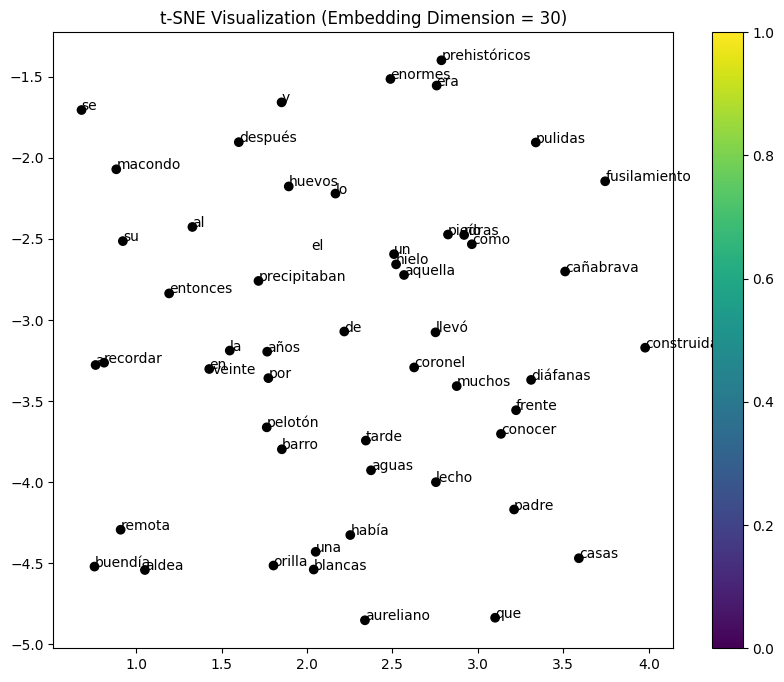

In [89]:
word_labels = list(words)  # Convierte el conjunto de palabras a una lista
vectors_30 = train_word_embedding(vocab_size, data, embedding_dim=30)
visualize_vectors(vectors_30, labels, word_labels, title='t-SNE Visualization (Embedding Dimension = 30)')

loss is :  23.65365
loss is :  21.773096
loss is :  20.600557
loss is :  19.735172
loss is :  19.056873
loss is :  18.51024
loss is :  18.056234
loss is :  17.664787
loss is :  17.317305
loss is :  17.002373
loss is :  16.7128
loss is :  16.443754
loss is :  16.191721
loss is :  15.954181
loss is :  15.729479
loss is :  15.516545
loss is :  15.314596
loss is :  15.122916
loss is :  14.940745
loss is :  14.767263
loss is :  14.601633
loss is :  14.443044
loss is :  14.290772
loss is :  14.144206
loss is :  14.002838
loss is :  13.86626
loss is :  13.73414
loss is :  13.606186
loss is :  13.482144
loss is :  13.3617735
loss is :  13.244844
loss is :  13.131163
loss is :  13.020543
loss is :  12.912827
loss is :  12.80786
loss is :  12.705502
loss is :  12.605611
loss is :  12.508046
loss is :  12.412665
loss is :  12.319337
loss is :  12.227933
loss is :  12.138339
loss is :  12.050452
loss is :  11.964187
loss is :  11.879472
loss is :  11.79624
loss is :  11.714439
loss is :  11.634014

<ipython-input-85-7846324c7246>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=labels, cmap='viridis')


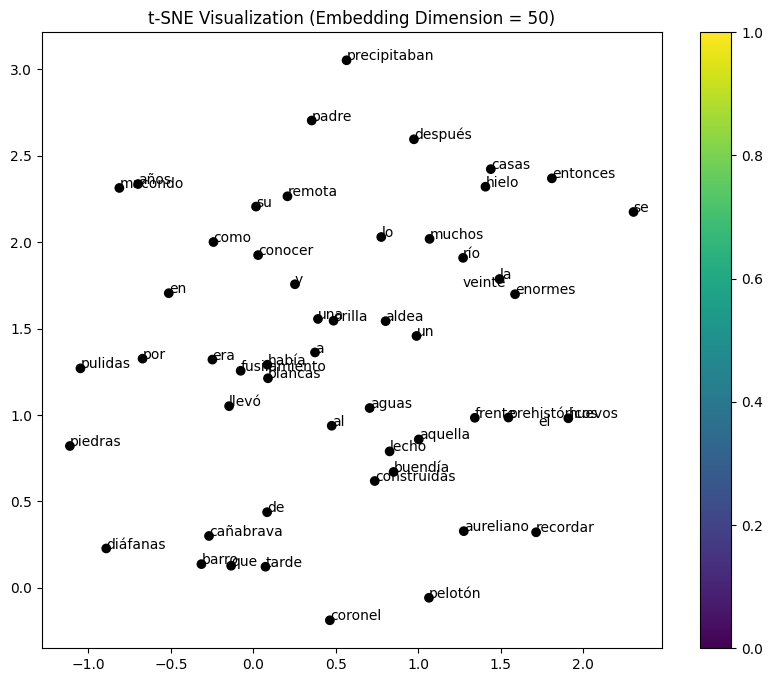

In [88]:
word_labels = list(words)  # Convierte el conjunto de palabras a una lista
vectors_50 = train_word_embedding(vocab_size, data, embedding_dim=50)
visualize_vectors(vectors_50, labels, word_labels, title='t-SNE Visualization (Embedding Dimension = 50)')

## Verificar el uso de la distancia euclidiana para mirar la cercanía de las tres palabras con respecto a los vectores W1+b1

In [99]:
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf_compat
tf_compat.disable_v2_behavior()

def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))


In [100]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def word_closeness(word1, word2, word3, vectors, word2int, b1):
    # Obtener los vectores correspondientes a las palabras
    vec_word1 = vectors[word2int[word1.lower()]]
    vec_word2 = vectors[word2int[word2.lower()]]
    vec_word3 = vectors[word2int[word3.lower()]]

    # Calcular los vectores W1 + b1 correspondientes a las palabras
    vec_word1_combined = vec_word1 + b1
    vec_word2_combined = vec_word2 + b1
    vec_word3_combined = vec_word3 + b1

    # Configuración de TensorFlow
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    # Placeholder para los vectores
    x = tf.placeholder(tf.float32, shape=(None, vec_word1_combined.shape[0]))

    # Calcular distancias euclidianas
    distance_word1_word2 = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(vec_word1_combined, vec_word2_combined))))
    distance_word1_word3 = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(vec_word1_combined, vec_word3_combined))))
    distance_word2_word3 = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(vec_word2_combined, vec_word3_combined))))

    # Evaluar las distancias
    dist_word1_word2_val, dist_word1_word3_val, dist_word2_word3_val = sess.run([distance_word1_word2, distance_word1_word3, distance_word2_word3])

    sess.close()

    return dist_word1_word2_val, dist_word1_word3_val, dist_word2_word3_val

# Ejemplo de uso
word1 = "Muchos"
word2 = "después"
word3 = "años"

# Calcular distancias
dist_word1_word2, dist_word1_word3, dist_word2_word3 = word_closeness(word1, word2, word3, vectors_30, word2int, b1)

# Imprimir resultados
print(f"Distancia entre {word1} y {word2}: {dist_word1_word2}")
print(f"Distancia entre {word1} y {word3}: {dist_word1_word3}")
print(f"Distancia entre {word2} y {word3}: {dist_word2_word3}")



Distancia entre Muchos y después: 6.736262798309326
Distancia entre Muchos y años: 6.540626525878906
Distancia entre después y años: 6.544947147369385


In [108]:
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def euclidean_dist(vec1, vec2):
    return tf.sqrt(tf.reduce_sum(tf.square(vec1 - vec2)))

def find_closest_word(word, vectors, word2int, int2word, b):
    # Obtener el índice de la palabra en el vocabulario
    word_index = word2int[word.lower()]

    # Obtener el vector correspondiente a la palabra
    query_vector = vectors[word_index] + b

    min_dist = float('inf')  # Inicializar con infinito positivo
    closest_word = None

    # Configuración de TensorFlow
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)  # Asegúrate de hacer esto

    # Definir la función de distancia euclidiana en TensorFlow
    euclidean_dist_tf = tf.function(euclidean_dist)

    for index, vector in enumerate(vectors):
        if index != word_index:
            distance = sess.run(euclidean_dist_tf(query_vector, vector + b))
            if distance < min_dist:
                min_dist = distance
                closest_word = int2word[index]

    # Cerrar la sesión
    sess.close()

    return closest_word




In [110]:
# Ejemplo con la palabra "años"
word_to_check = "años"
closest_word = find_closest_word(word_to_check, vectors_30, word2int, int2word, b1)
print(f"La palabra más cercana a '{word_to_check}' es '{closest_word}'.")


La palabra más cercana a 'años' es 'precipitaban'.


In [109]:
# Ejemplo con la palabra "Muchos"
word_to_check = "Muchos"
closest_word = find_closest_word(word_to_check, vectors_30, word2int, int2word, b1)
print(f"La palabra más cercana a '{word_to_check}' es '{closest_word}'.")


La palabra más cercana a 'Muchos' es 'un'.


In [111]:
# Ejemplo con la palabra "después"
word_to_check = "después"
closest_word = find_closest_word(word_to_check, vectors_30, word2int, int2word, b1)
print(f"La palabra más cercana a '{word_to_check}' es '{closest_word}'.")

La palabra más cercana a 'después' es 'y'.


## Resolver el problema 2 utilizando el modelo word2Vec

In [ ]:
# Importar las bibliotecas necesarias
import re
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Texto de entrada
texto = "Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces unaaldeadeveintecasasdebarroycañabravaconstruidasalaorilladeun río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos."

# Preprocesamiento del texto
texto = re.sub(r'\s+', ' ', texto)  # Eliminar espacios adicionales
oraciones = [re.findall(r'\b\w+\b', oracion.lower()) for oracion in texto.split('.')]  # Dividir en oraciones y tokenizar

# Entrenar el modelo Word2Vec
modelo_dim_30 = Word2Vec(sentences=oraciones, vector_size=30, window=3, sg=1, min_count=1)
modelo_dim_50 = Word2Vec(sentences=oraciones, vector_size=50, window=3, sg=1, min_count=1)



### Imprimir la salida de los vectores de W1+b1 para los dos embeddings (30 y 50)

In [ ]:
# Función para imprimir los vectores W1 + b1
def imprimir_vectores_w1_b1(modelo, dimension):
    print(f"Vectores de W1 + b1 (Dimensión {dimension}):")
    for palabra in modelo.wv.index_to_key:
        indice = modelo.wv.key_to_index[palabra]
        vector_w1_b1 = modelo.wv[palabra] + modelo.wv.get_normed_vectors()[indice]
        print(f"{palabra}: {vector_w1_b1}")

# Imprimir vectores para ambas dimensiones
imprimir_vectores_w1_b1(modelo_dim_30, dimension=30)
imprimir_vectores_w1_b1(modelo_dim_50, dimension=50)


Vectores de W1 + b1 (Dimensión 30):
de: [-0.02263162  0.00969845  0.17968018  0.3150365  -0.3248807  -0.2486318
  0.2252331   0.31210876 -0.1761441  -0.13276844  0.2569227  -0.05324885
 -0.15949841  0.22583434 -0.17015813 -0.06478486  0.10060018  0.03327277
 -0.2870806  -0.32837123  0.255167    0.17742574  0.23348367  0.02829289
  0.22393309 -0.11750256 -0.03358524  0.20247066 -0.2640798  -0.13693324]
que: [-0.24576019 -0.02952929  0.3116668  -0.23799415 -0.07625915 -0.06306667
  0.2620408  -0.19335052  0.00072886 -0.15539043 -0.31190625  0.16294958
 -0.28506243 -0.14445806 -0.00134412 -0.01151463 -0.24838711  0.31231642
  0.16258894  0.30027893 -0.2648598   0.14581153 -0.13560915  0.02766847
  0.27687597 -0.14407867  0.14664084 -0.21962745 -0.11665552  0.3057367 ]
el: [-0.06499322  0.01404977 -0.16820973 -0.31178877 -0.06170373  0.09988262
 -0.03728815  0.22442627 -0.11220811  0.09150387  0.22248909  0.33986264
 -0.05905089 -0.37563086  0.17756647  0.02252323  0.30290464 -0.03303891
 

### Visualización en tsne de los vectores del texto con los embeddings de dimensión de 30 y 50

             
    Visualización con t-SNE (Dim 30)         
             


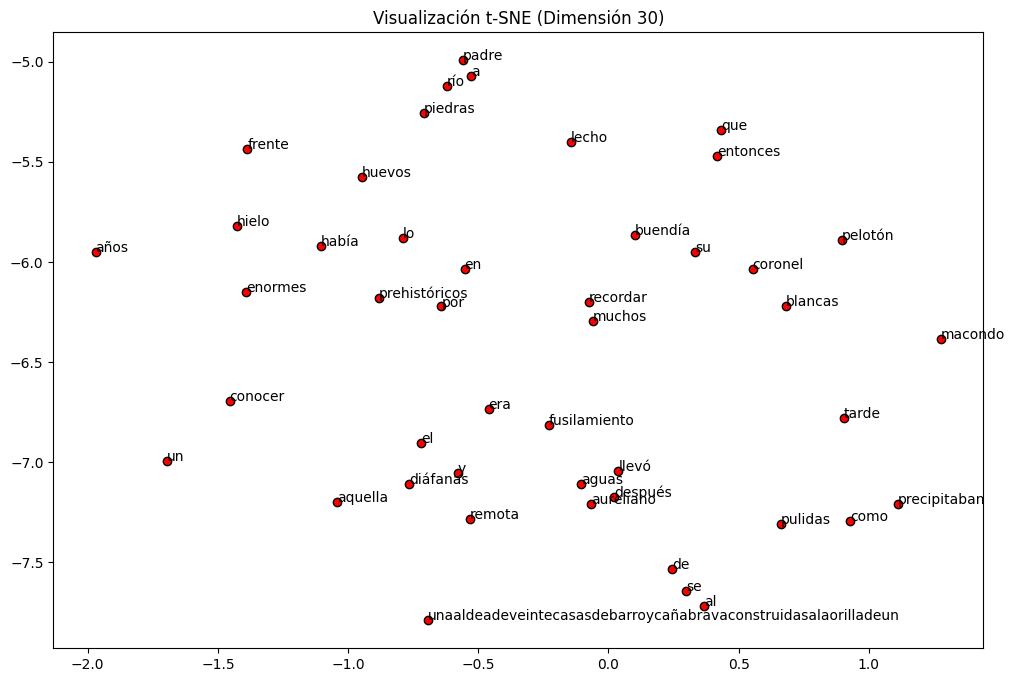

             
             
    Visualización con t-SNE (Dim 50)         
             


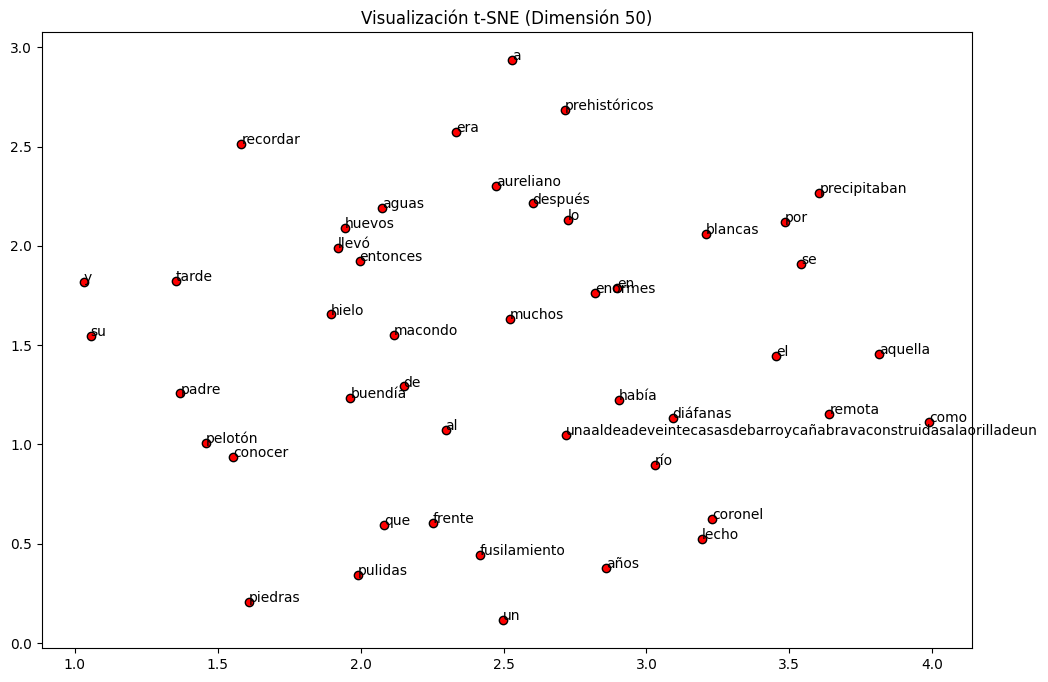

In [ ]:
# Función para visualizar palabras usando t-SNE
def visualizar_tsne(modelo, dimension):
    words = list(modelo.wv.index_to_key)
    vectors_tsne = TSNE(n_components=2, random_state=42).fit_transform(modelo.wv.vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, vectors_tsne):
        plt.text(x, y, word)

    plt.title(f'Visualización t-SNE (Dimensión {dimension})')
    plt.show()

# Visualizar palabras en el plano cartesiano para ambas dimensiones
print("             ")
print("    Visualización con t-SNE (Dim 30)         ")
print("             ")
visualizar_tsne(modelo_dim_30, dimension=30)
print("             ")
print("             ")
print("    Visualización con t-SNE (Dim 50)         ")
print("             ")
visualizar_tsne(modelo_dim_50, dimension=50)


### Distancia euclidiana entre 3 palabras

In [ ]:
import numpy as np

def euclidean_dist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)


In [ ]:
# Palabras de interés
palabra1 = 'coronel'
palabra2 = 'padre'
palabra3 = 'hielo'

# Obtener vectores W1 + b1 para las palabras de interés
vector1 = modelo_dim_30.wv[palabra1] + modelo_dim_30.wv.get_normed_vectors()[modelo_dim_30.wv.key_to_index[palabra1]]
vector2 = modelo_dim_30.wv[palabra2] + modelo_dim_30.wv.get_normed_vectors()[modelo_dim_30.wv.key_to_index[palabra2]]
vector3 = modelo_dim_30.wv[palabra3] + modelo_dim_30.wv.get_normed_vectors()[modelo_dim_30.wv.key_to_index[palabra3]]

# Calcular distancias euclidianas
distancia_12 = euclidean_dist(vector1, vector2)
distancia_13 = euclidean_dist(vector1, vector3)
distancia_23 = euclidean_dist(vector2, vector3)

# Imprimir resultados
print(f'Distancia entre "{palabra1}" y "{palabra2}": {distancia_12}')
print(f'Distancia entre "{palabra1}" y "{palabra3}": {distancia_13}')
print(f'Distancia entre "{palabra2}" y "{palabra3}": {distancia_23}')


Distancia entre "coronel" y "padre": 1.7878971099853516
Distancia entre "coronel" y "hielo": 1.5038899183273315
Distancia entre "padre" y "hielo": 1.525566816329956
